<a href="https://colab.research.google.com/github/dominiquebuford/DL-individual/blob/main/DL_individual_classicalML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!git clone https://github.com/dominiquebuford/DL-individual.git

Cloning into 'DL-individual'...
remote: Enumerating objects: 894, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 894 (delta 15), reused 27 (delta 9), pack-reused 855
Receiving objects: 100% (894/894), 436.91 MiB | 33.45 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (855/855), done.


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('DL-individual/data/normalized_annotations_final.csv')

In [14]:
X = df.drop('Activity', axis=1)  # Drop the target variable column
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_classifier = SVC(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', 'poly', etc.
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Accuracy: 0.47297297297297297
Classification Report:
                                                       precision    recall  f1-score   support

                                           basketball       0.22      0.22      0.22         9
                                              bowling       0.75      1.00      0.86         3
                                               boxing       0.50      0.67      0.57         6
                                             football       0.00      0.00      0.00         4
                                                 golf       0.47      0.88      0.61         8
                                           hacky sack       0.25      0.20      0.22         5
                                   rowing, stationary       0.72      0.95      0.82        19
                                        skateboarding       0.00      0.00      0.00         4
                                     skiing, downhill       0.00      0.00      0.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


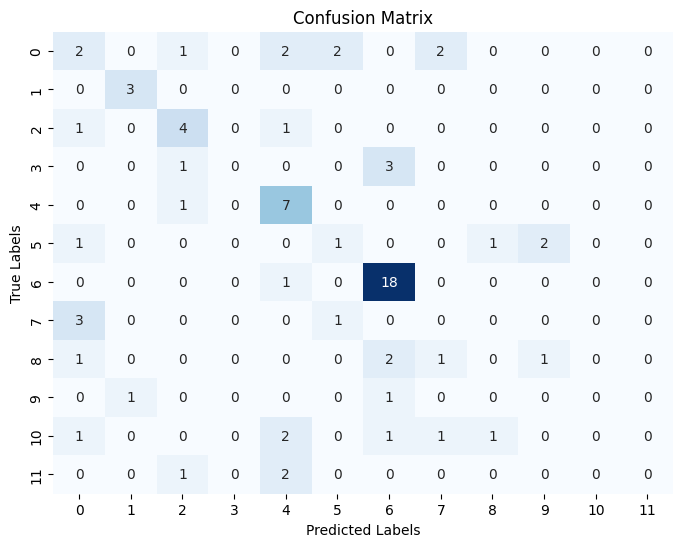

In [17]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()